## Loading data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [2]:
# Finding % of missing values
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


## Imputation using Pandas

In [3]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Finding % of missing values
X_train.isnull().mean()*100

,0
Age,19.662921
Fare,5.056180
Family,0.000000


In [5]:
# Age column
X_train['Age_mean'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Age_median'] = X_train['Age'].fillna(X_train['Age'].median())

# Fare column
X_train['Fare_mean'] = X_train['Fare'].fillna(X_train['Fare'].mean())
X_train['Fare_median'] = X_train['Fare'].fillna(X_train['Fare'].median())

In [6]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
90,29.0,8.0500,0,29.0,29.0,8.050000,8.0500
345,24.0,13.0000,0,24.0,24.0,13.000000,13.0000
867,31.0,50.4958,0,31.0,31.0,50.495800,50.4958
316,24.0,NaN,1,24.0,24.0,32.517788,14.4000
871,47.0,NaN,2,47.0,47.0,32.517788,14.4000
873,47.0,9.0000,0,47.0,47.0,9.000000,9.0000
663,36.0,7.4958,0,36.0,36.0,7.495800,7.4958
317,54.0,14.0000,0,54.0,54.0,14.000000,14.0000
595,36.0,24.1500,2,36.0,36.0,24.150000,24.1500
173,21.0,7.9250,0,21.0,21.0,7.925000,7.9250


In [7]:
# Variance before and after for Age
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225


In [8]:
# Variance before and after for Fare
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


In [9]:
# Covariance before and after imputation
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [10]:
# Correlation before and after imputation
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


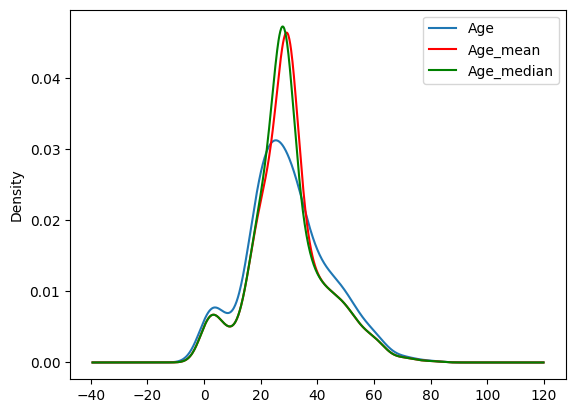

In [11]:
# Change in distribution of Age before and after imputation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Age_median'].plot(kind='kde', ax=ax, color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')

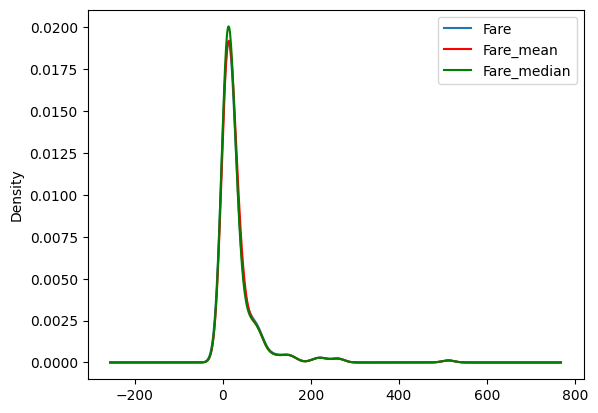

In [12]:
# Change in distribution of Fare before and after imputation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')

<Axes: >

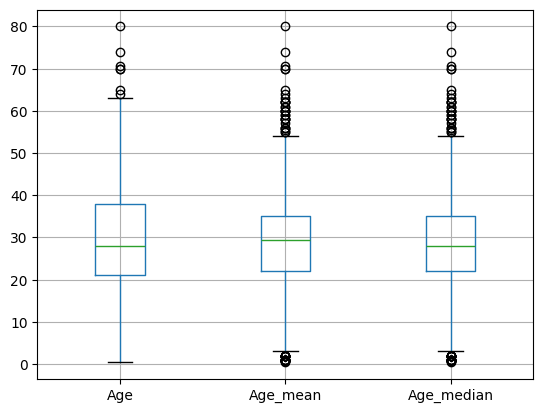

In [13]:
# Change in outliers of Age after imputation
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

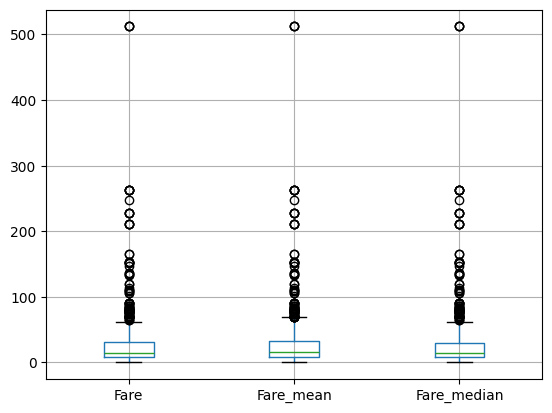

In [14]:
# Change in outliers of Fare after imputation
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

## Imputation using Scikit learn

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Sklearn simpleImputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [17]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [20]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [21]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [22]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])